In [1]:
import multiprocessing
from pathlib import Path
from mmcv.utils.config import Config
from mmseg.datasets import build_dataset
from torch.utils.data import DataLoader
import src.datasets
import src.transforms
import numpy as np
from tqdm import tqdm

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [3]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [4]:
uni_num_classes = 189

In [5]:
preprocess_pipeline = [
    dict(type="LoadAnnotations"),
    dict(type="MapAnnotations")
]

## Cityscapes class pixel frequencies

In [7]:
dataset_type = 'UniversalCityscapesDataset'
data_root = '/ds-av/public_datasets/cityscapes/raw'

In [50]:
preprocess_config = dict(
        type='UniversalCityscapesDataset',
        data_root='/ds-av/public_datasets/cityscapes/raw',
        img_dir='leftImg8bit/train',
        ann_dir='gtFine/train',
        seg_map_suffix='_gtFine_labelIds.png',
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/cityscapes_class_mapping.csv",
        ignore_index=0,  # gt has Labelids
        dataset_name="cityscapes",
        pipeline=preprocess_pipeline,
)

In [51]:
dataset = build_dataset(preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=6, num_workers=6, collate_fn=lambda d: None
    )

In [10]:
def collate_batch_fn(data):
    data_dict = dict()
    for each_data in data:
        data_dict[each_data["img_info"]["filename"].name] = each_data["gt_semantic_seg"]
    return data_dict

In [52]:
dataloader.collate_fn = collate_batch_fn

In [53]:
class_pixel_frq = np.zeros(189)

In [54]:

for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            class_pixel_frq[each_class] += count
        


100%|██████████| 496/496 [01:38<00:00,  5.06it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


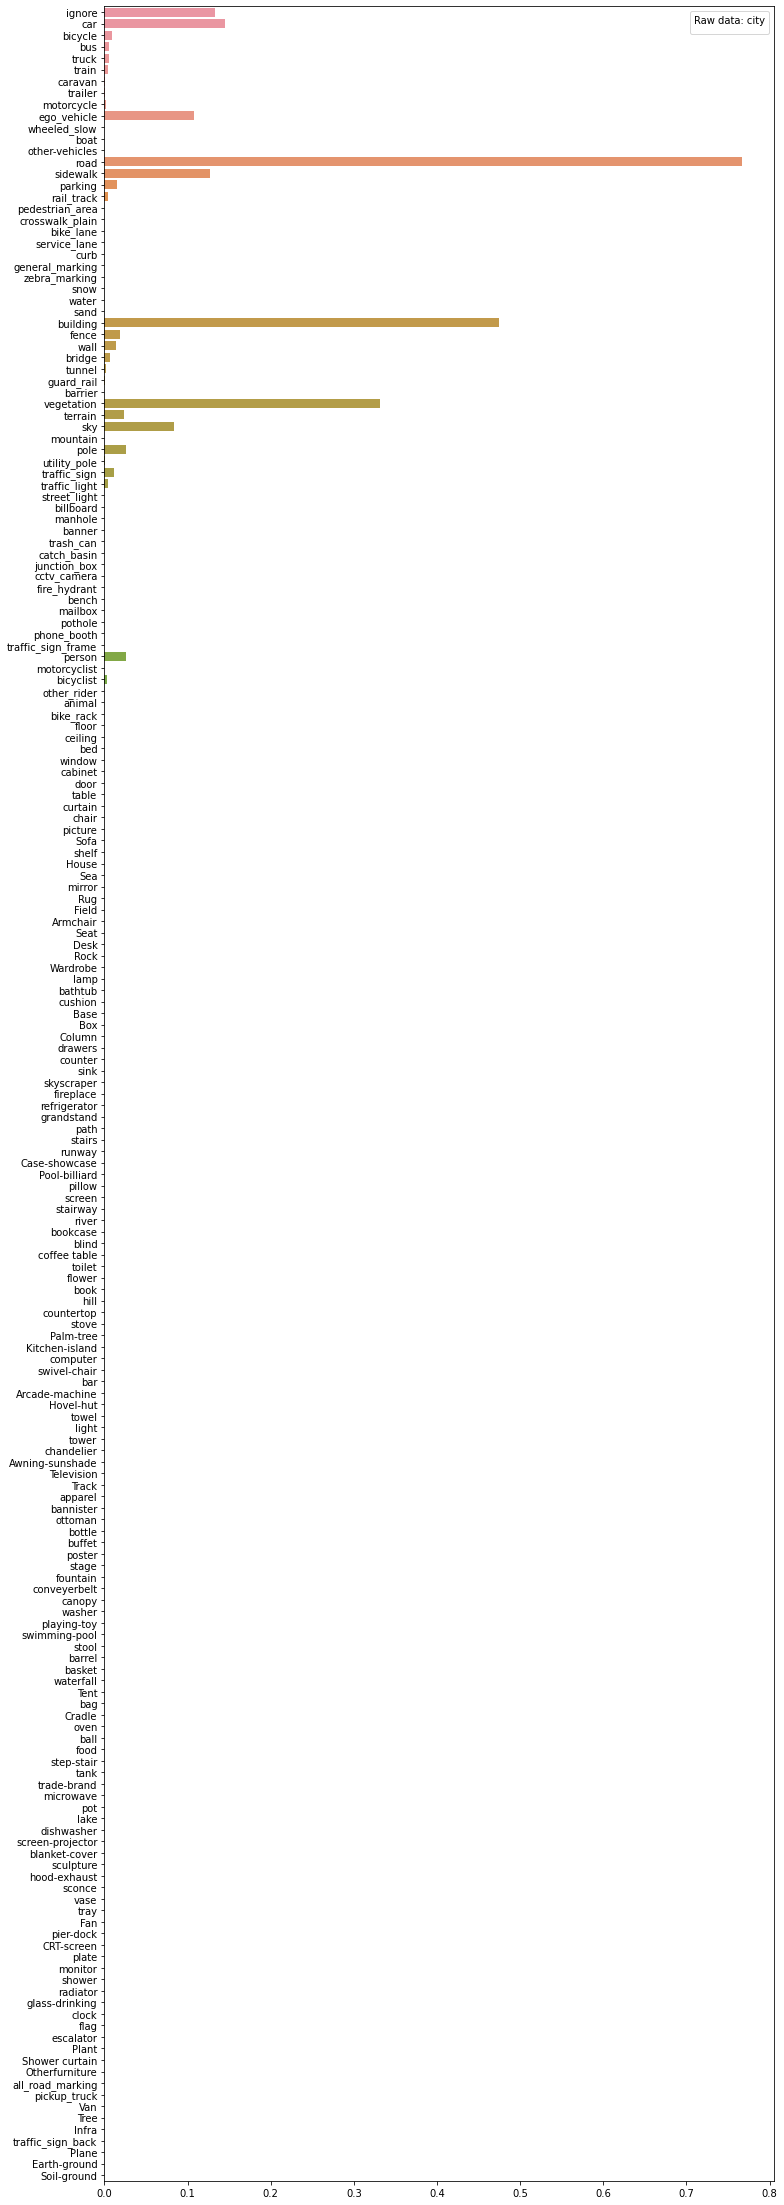

In [84]:
np.savetxt("cityscapes_pixel_count.csv", class_pixel_frq, delimiter=";")
norm = np.linalg.norm(class_pixel_frq)
class_pixel_frq_norm = class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: city')

In [85]:
np.savetxt("cityscapes_pixel_count.csv", class_pixel_frq, delimiter=";")

## Vistas class pixel frequencies

In [6]:
v_preprocess_config = dict(
    type='VistasDataset',
    data_root='/ds-av/public_datasets/mapillary_vistas_v2.0/raw/',
    img_dir='training/images',
    ann_dir='training/v1.2/labels',
    seg_map_suffix='.png',
    universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
    dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/vistas_class_mapping.csv",
    dataset_name="vistas",
    pipeline=preprocess_pipeline),

In [8]:
dataset = build_dataset(v_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )

In [11]:
dataloader.collate_fn = collate_batch_fn

In [12]:
v_class_pixel_frq = np.zeros(189)

In [13]:
for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            v_class_pixel_frq[each_class] += count

100%|██████████| 1125/1125 [55:51<00:00,  2.98s/it] 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


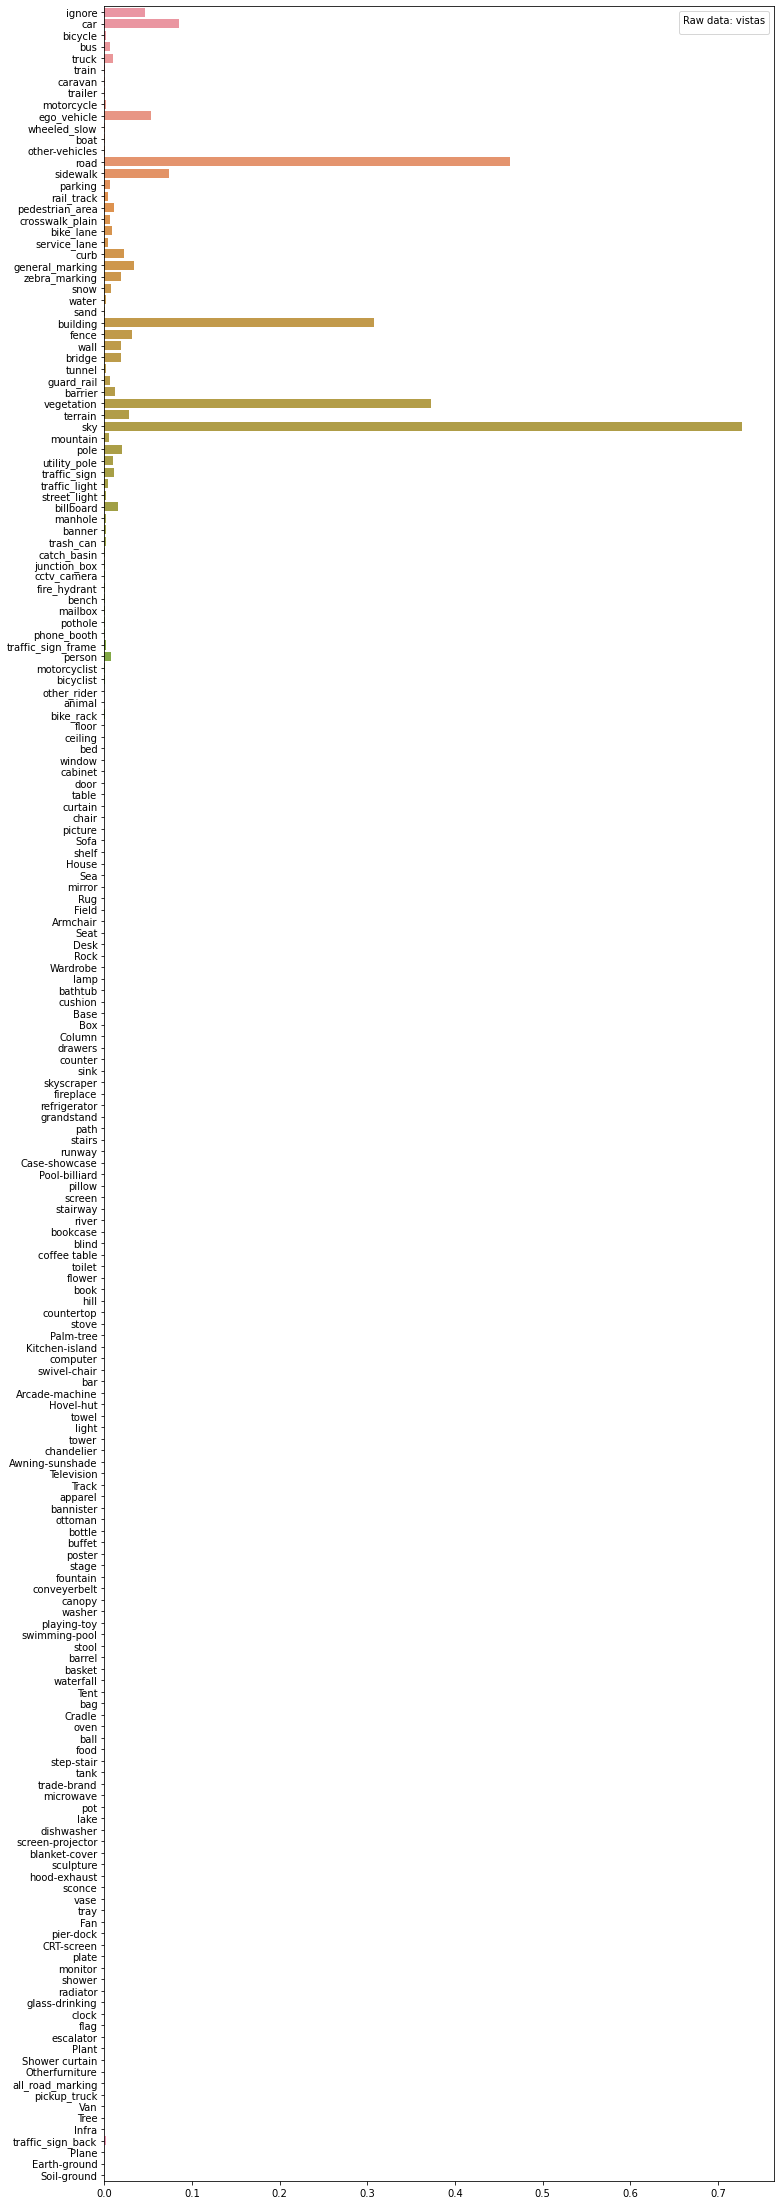

In [86]:
np.savetxt("vistas_pixel_count.csv", v_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(v_class_pixel_frq)
v_class_pixel_frq_norm = v_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=v_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: vistas')

## Ade class pixel frequencies

In [14]:
a_preprocess_config = dict(
        type='UniversalAdeDataset',
        data_root='/ds-av/public_datasets/ade_20k/raw',
        img_dir='images/training',
        ann_dir='annotations/training',
        seg_map_suffix='.png',
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/ade20k_class_mapping.csv",
        is_color_to_uni_class_mapping=False,
        dataset_name="ade",
        pipeline=preprocess_pipeline)

In [15]:
dataset = build_dataset(a_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )

In [16]:
dataloader.collate_fn = collate_batch_fn

In [17]:
a_class_pixel_frq = np.zeros(189)

In [18]:
for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            a_class_pixel_frq[each_class] += count

100%|██████████| 1264/1264 [02:04<00:00, 10.15it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


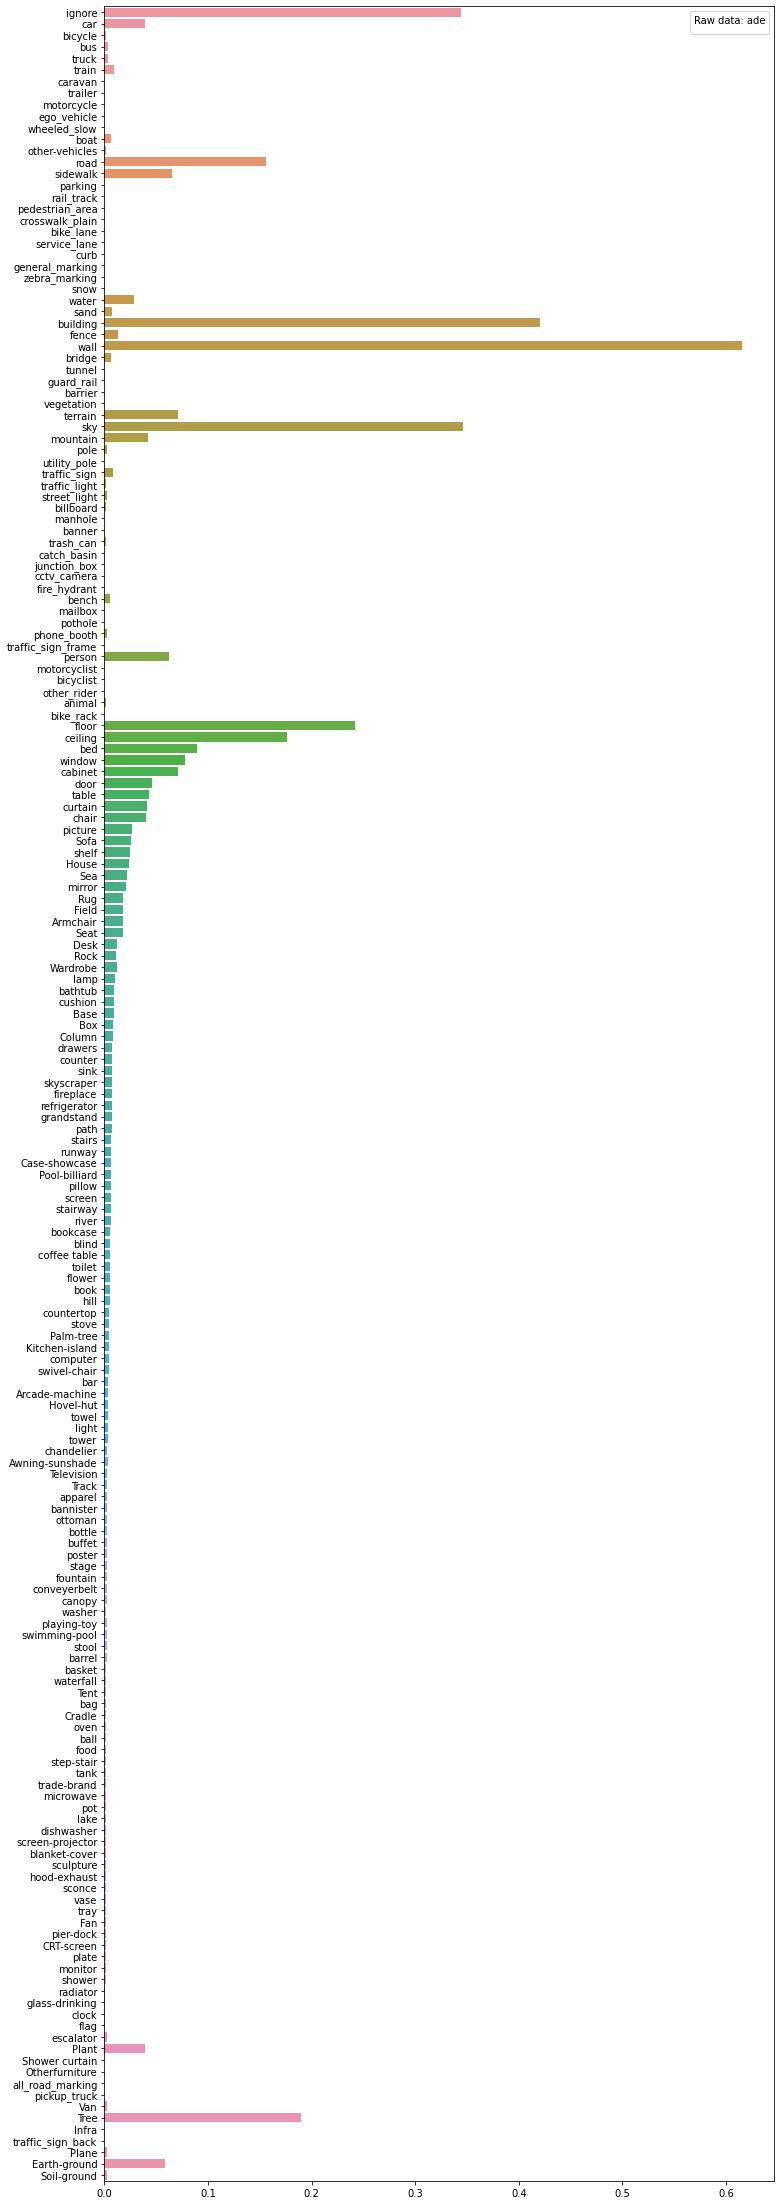

In [87]:
np.savetxt("ade_pixel_count.csv", a_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(a_class_pixel_frq)
a_class_pixel_frq_norm = a_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=a_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: ade')

## Viper 

In [23]:
vip_preprocess_config = dict(
        type='UniversalViperDataset',
        data_root='/ds-av/public_datasets/viper/raw',
        img_dir='train/img',
        ann_dir='train/cls',
        seg_map_suffix='.png',
        img_suffix=".jpg",
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/viper_class_mapping.csv",
        dataset_name="viper",
        ignore_index=0,  # gt are Label ids
        pipeline=preprocess_pipeline)

In [24]:
dataset = build_dataset(vip_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )

In [30]:
dataloader.collate_fn = collate_batch_fn

In [25]:
len(dataloader)

8381

In [34]:
vip_class_pixel_frq = np.zeros(189)

In [35]:
for batch in tqdm(iter(dataloader)):
    
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            vip_class_pixel_frq[each_class] += count

100%|██████████| 8381/8381 [1:14:17<00:00,  1.88it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


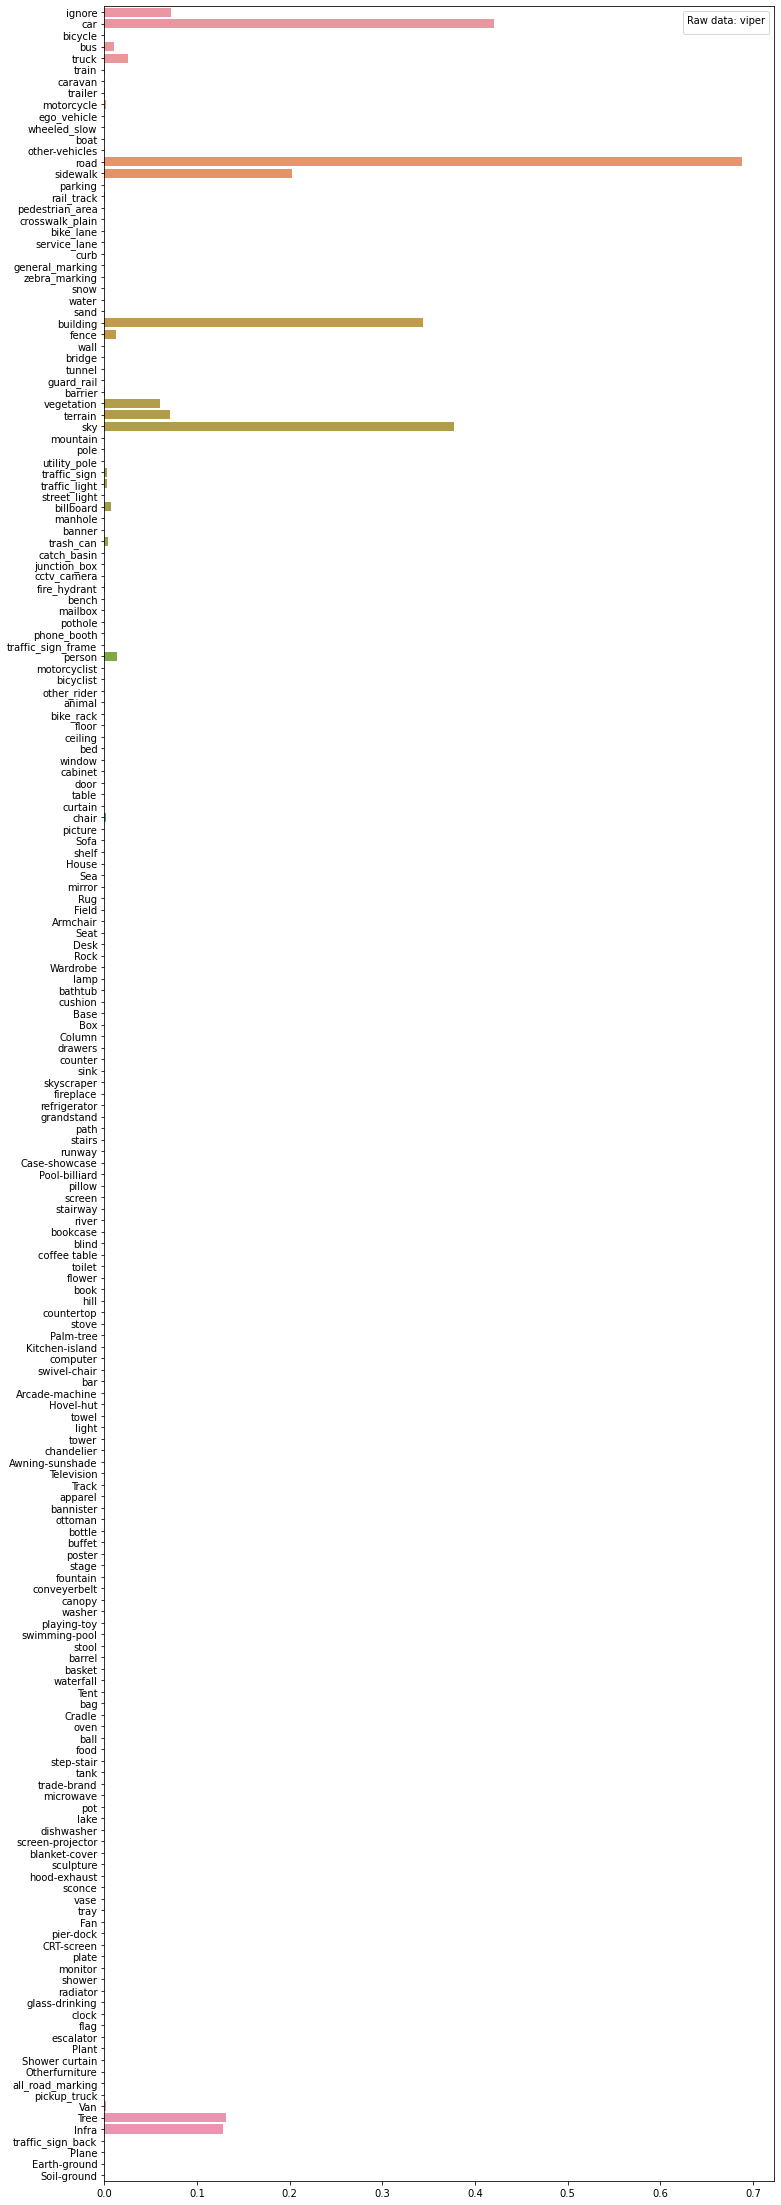

In [88]:
np.savetxt("viper_pixel_count.csv", vip_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(vip_class_pixel_frq)
vip_class_pixel_frq_norm = vip_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=vip_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: viper')

## wilddash

In [36]:
wild_preprocess_config = dict(
        type='UniversalWilddashDataset',
        data_root='/ds-av/public_datasets/wilddash2/raw/public',
        img_dir='images',
        ann_dir='labels',
        seg_map_suffix='.png',
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/wilddash_class_mapping.csv",
        is_color_to_uni_class_mapping=False,
        dataset_name="wilddash",
        pipeline=preprocess_pipeline)

In [37]:
dataset = build_dataset(wild_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )
dataloader.collate_fn = collate_batch_fn

In [38]:
wild_class_pixel_frq = np.zeros(189)

In [39]:
for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            wild_class_pixel_frq[each_class] += count

100%|██████████| 223/223 [02:00<00:00,  1.85it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


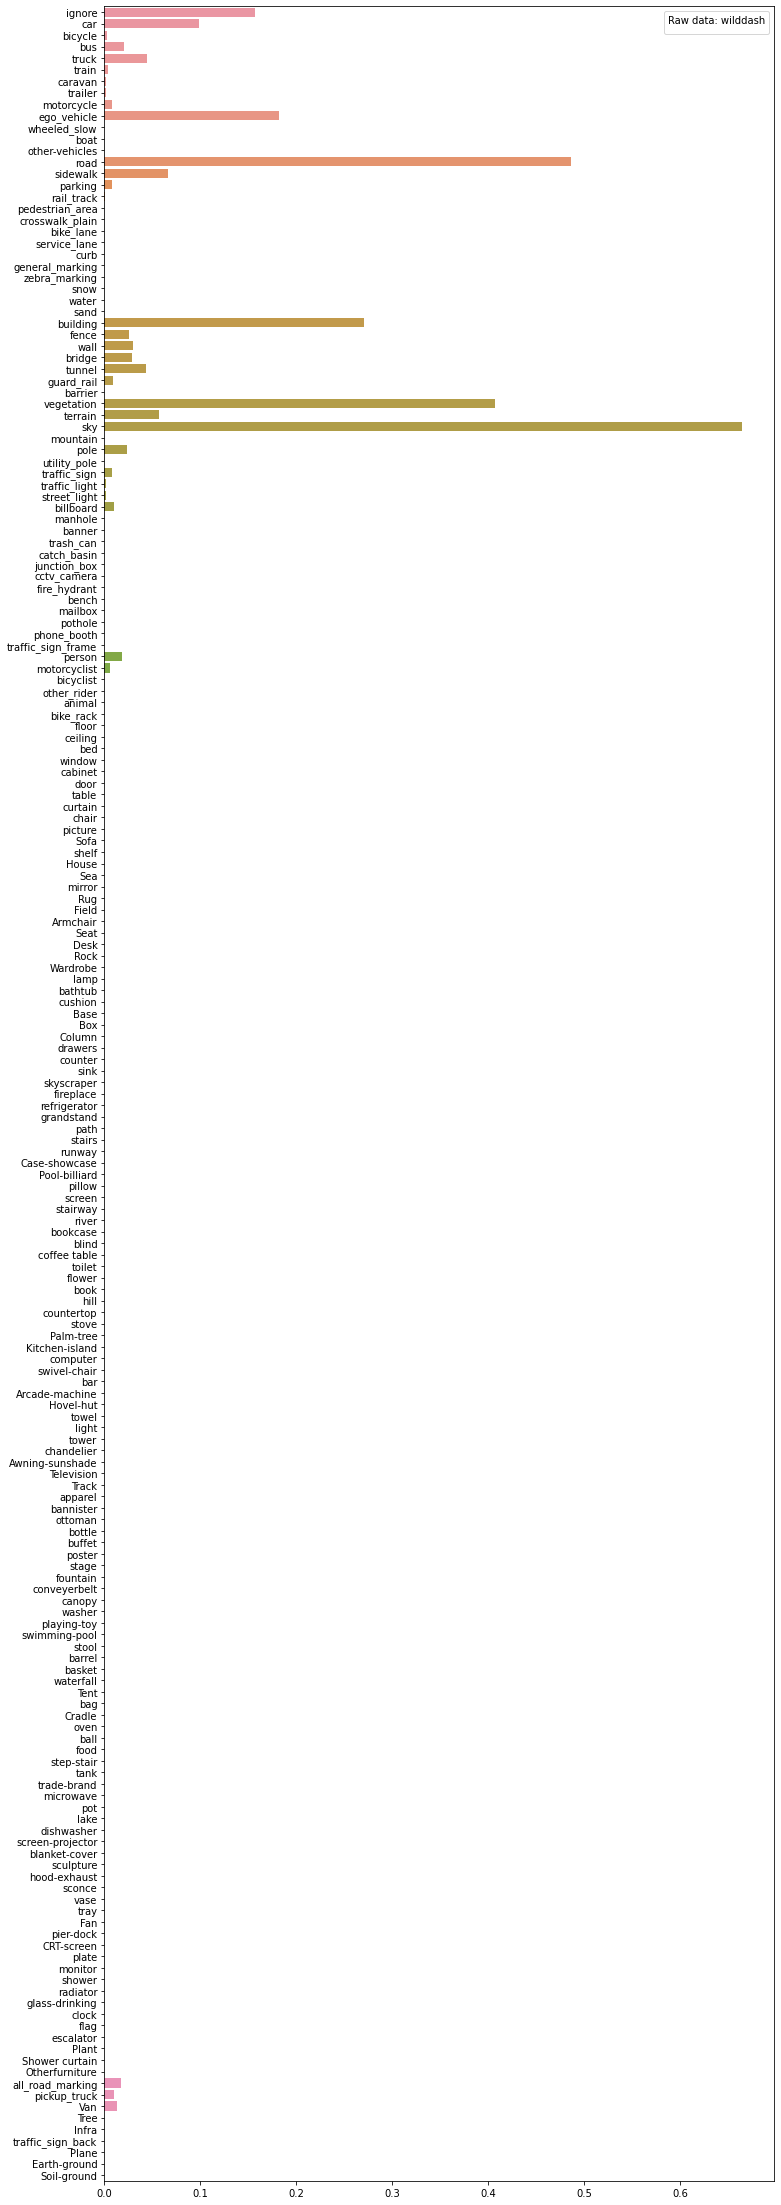

In [89]:
np.savetxt("wilddash_pixel_count.csv", wild_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(wild_class_pixel_frq)
wild_class_pixel_frq_norm = wild_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=wild_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: wilddash')

## scannet 

In [40]:
scannet_preprocess_config = dict(
        type='UniversalScannetDataset',
        data_root='/netscratch/gautam/scannet/',
        img_dir='scans',
        ann_dir='scans',
        seg_map_suffix='_labelId.png',
        split="/netscratch/gautam/scannet/scannet_train.json",
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/scannet_class_mapping.csv",
        is_color_to_uni_class_mapping=False,
        dataset_name="scannet",
        pipeline=preprocess_pipeline)

In [41]:
dataset = build_dataset(scannet_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )
dataloader.collate_fn = collate_batch_fn
scannet_class_pixel_frq = np.zeros(189)

for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            scannet_class_pixel_frq[each_class] += count

100%|██████████| 6250/6250 [29:37<00:00,  3.52it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


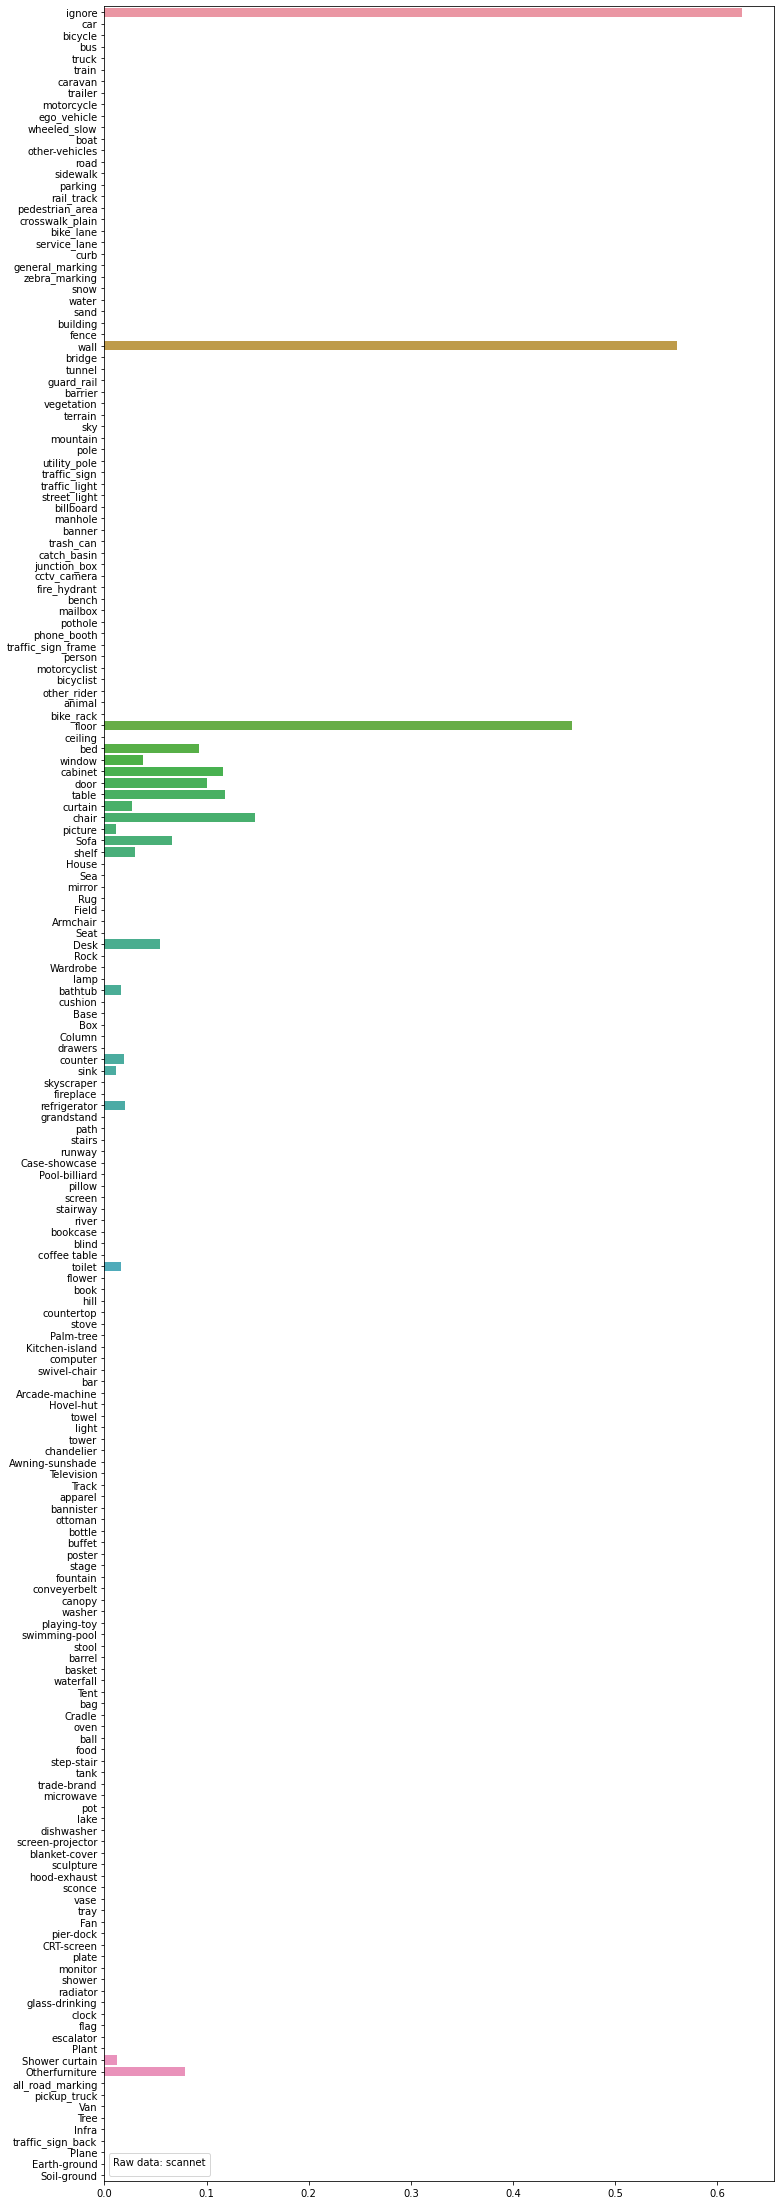

In [90]:
np.savetxt("scannet_pixel_count.csv", scannet_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(scannet_class_pixel_frq)
scannet_class_pixel_frq_norm = scannet_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=scannet_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: scannet')

## IDD

In [42]:
idd_preprocess_config = dict(
        type='UniversalIddDataset',
        data_root='/netscratch/gautam/idd_segmentation/raw',
        img_dir='leftImg8bit/train',
        ann_dir='gtFine/train',
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/idd_class_mapping.csv",
        pipeline=preprocess_pipeline)

In [43]:
dataset = build_dataset(idd_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )
dataloader.collate_fn = collate_batch_fn
idd_class_pixel_frq = np.zeros(189)

for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            idd_class_pixel_frq[each_class] += count

100%|██████████| 438/438 [03:03<00:00,  2.39it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


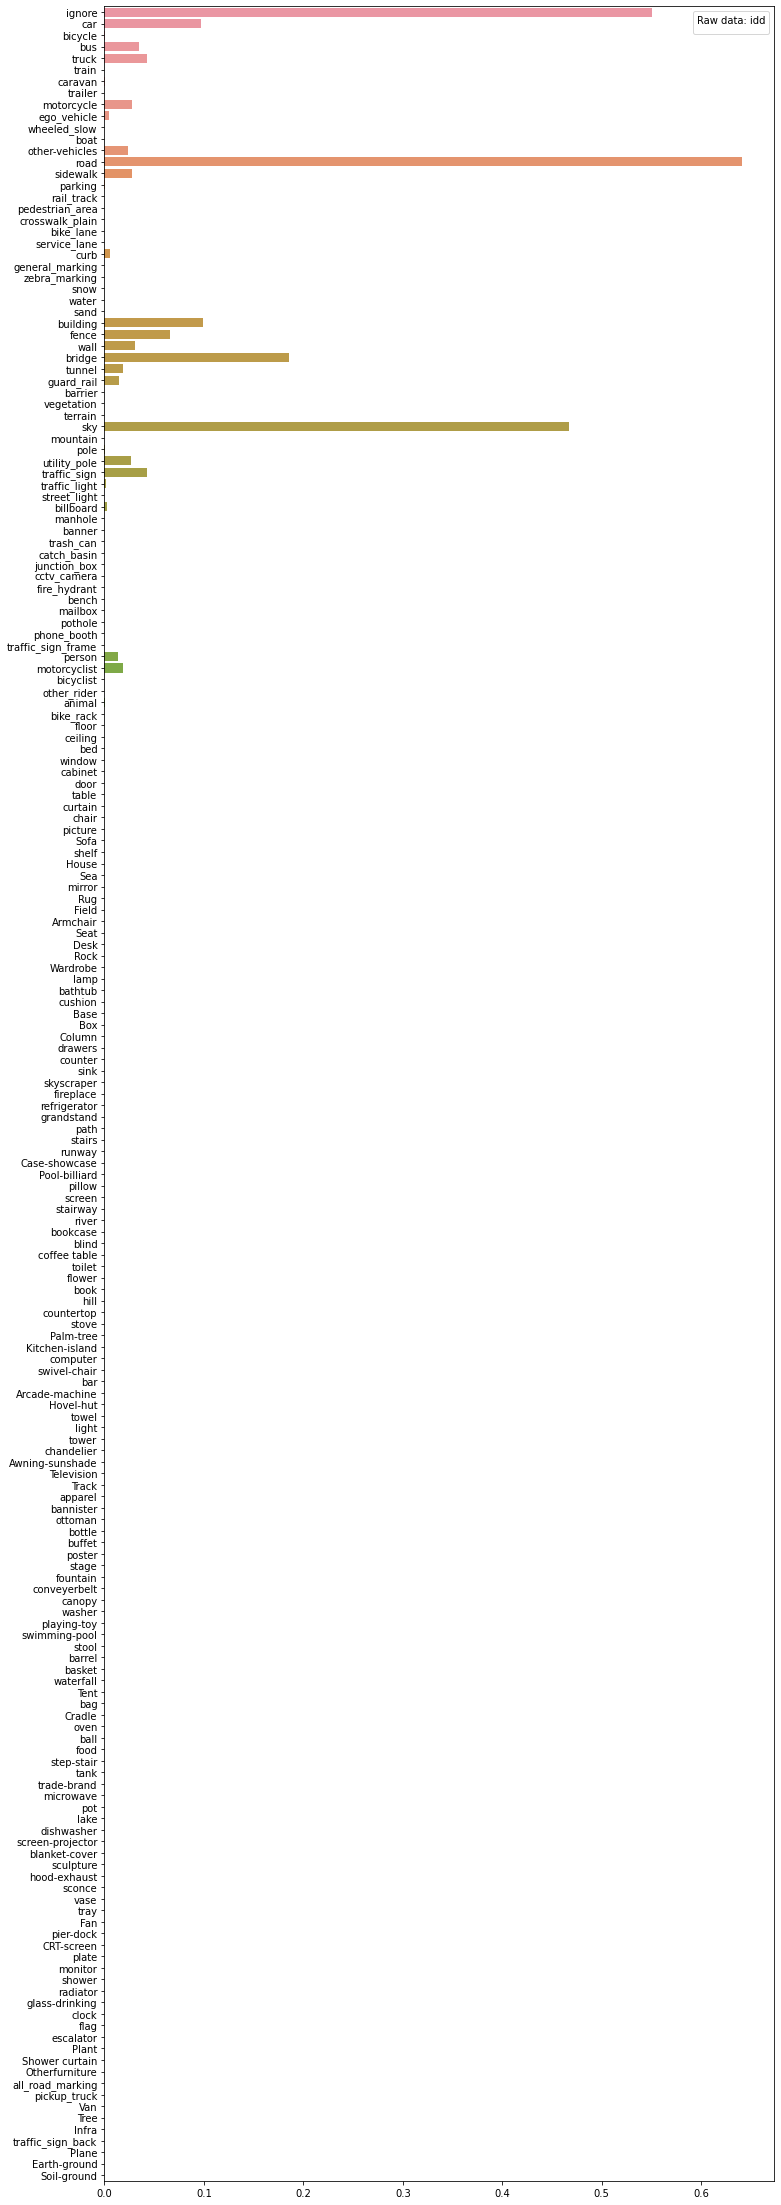

In [91]:
np.savetxt("idd_pixel_count.csv", idd_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(idd_class_pixel_frq)
idd_class_pixel_frq_norm = idd_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=idd_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: idd')

## GTA5

In [44]:
gta_preprocess_config = dict(
        type='UniversalPlayingForDataDataset',
        data_root='/ds-av/public_datasets/playing_for_data/raw',
        img_dir='images',
        ann_dir='labels',
        split="/netscratch/gautam/playing_for_data/train.txt",
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/playing_for_data_class_mapping.csv",
        pipeline=preprocess_pipeline)

In [45]:
dataset = build_dataset(gta_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )
dataloader.collate_fn = collate_batch_fn
gta_class_pixel_frq = np.zeros(189)

for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            gta_class_pixel_frq[each_class] += count

100%|██████████| 1561/1561 [12:48<00:00,  2.03it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


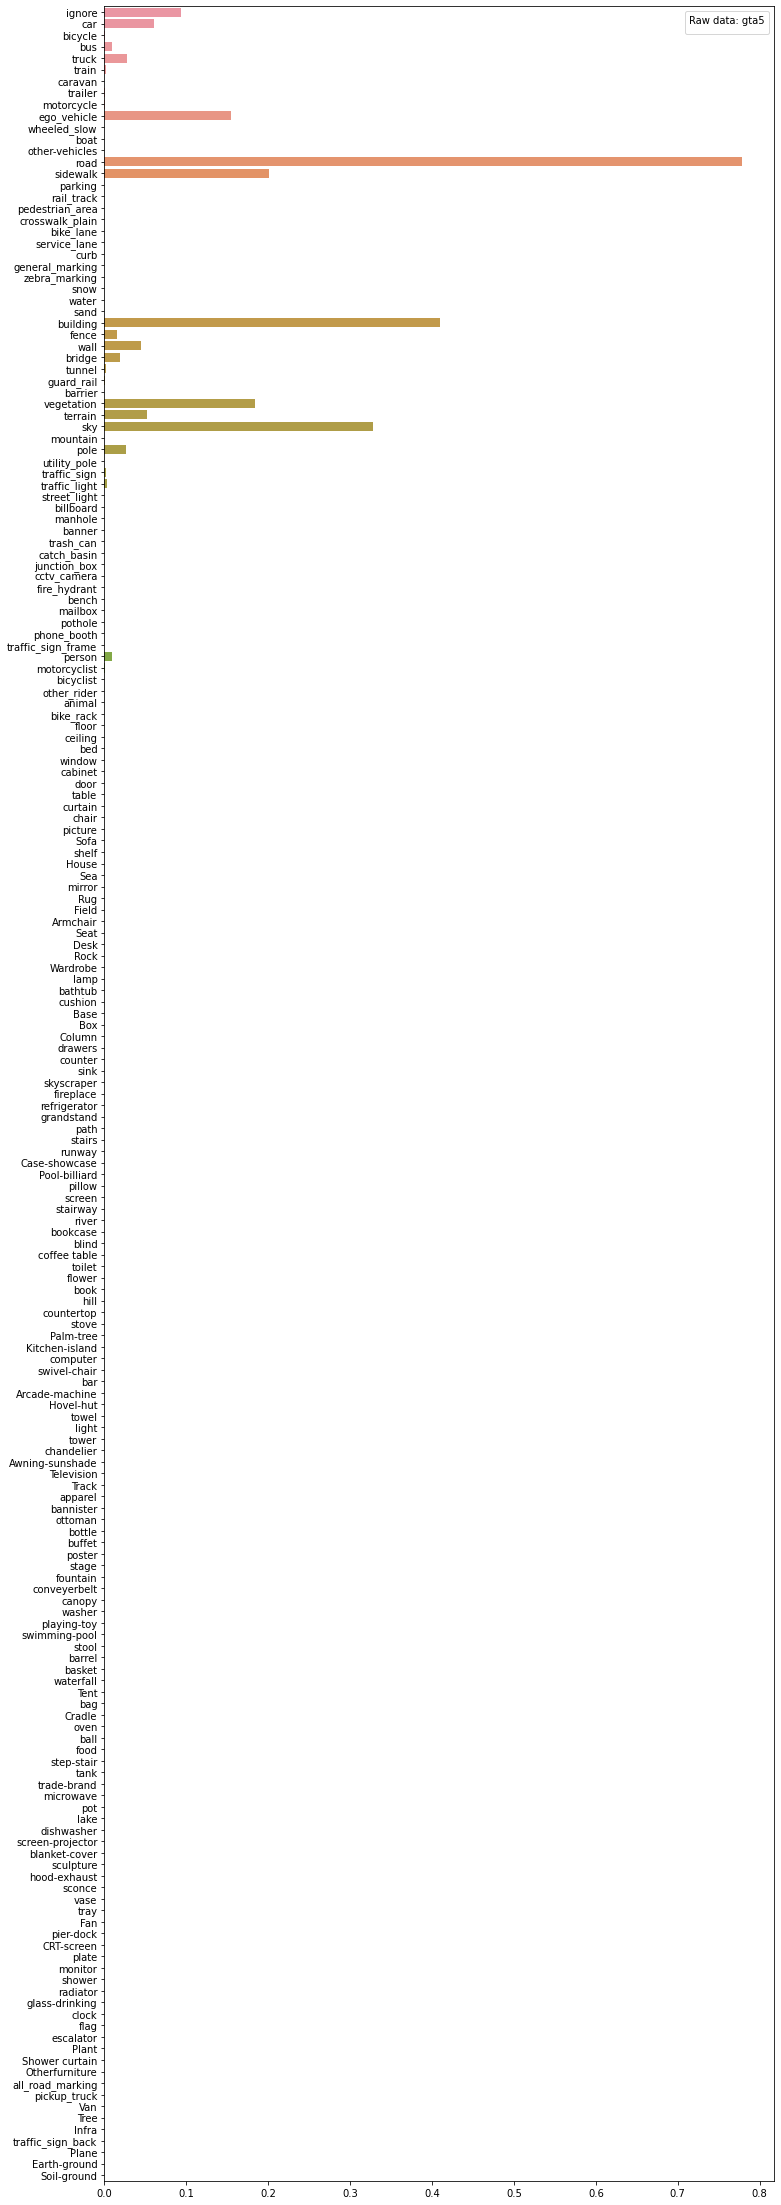

In [92]:
np.savetxt("gta5_pixel_count.csv", gta_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(gta_class_pixel_frq)
gta_class_pixel_frq_norm = gta_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=gta_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: gta5')

## BDD 

In [46]:
bdd_preprocess_config = dict(
        type='UniversalBdd10kDataset',
        data_root='/ds-av/public_datasets/bdd100k/raw',
        img_dir='images/10k/train',
        ann_dir='labels/sem_seg/masks/train',
        universal_class_colors_path="/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv",
        dataset_class_mapping="/netscratch/gautam/semseg/configs/_base_/class_mapping/bdd10k_class_mapping.csv",
        pipeline=preprocess_pipeline)

In [47]:
dataset = build_dataset(bdd_preprocess_config)
dataloader = DataLoader(
        dataset, batch_size=16, num_workers=16, collate_fn=lambda d: None
    )
dataloader.collate_fn = collate_batch_fn
bdd_class_pixel_frq = np.zeros(189)

for batch in tqdm(iter(dataloader)):
    #print(np.unique(list(batch.values())[0]))
    for each_gt in list(batch.values()):
        classes, counts = np.unique(each_gt, return_counts=True)
        
        for each_class, count in zip(classes, counts):
            bdd_class_pixel_frq[each_class] += count

100%|██████████| 438/438 [01:37<00:00,  4.51it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


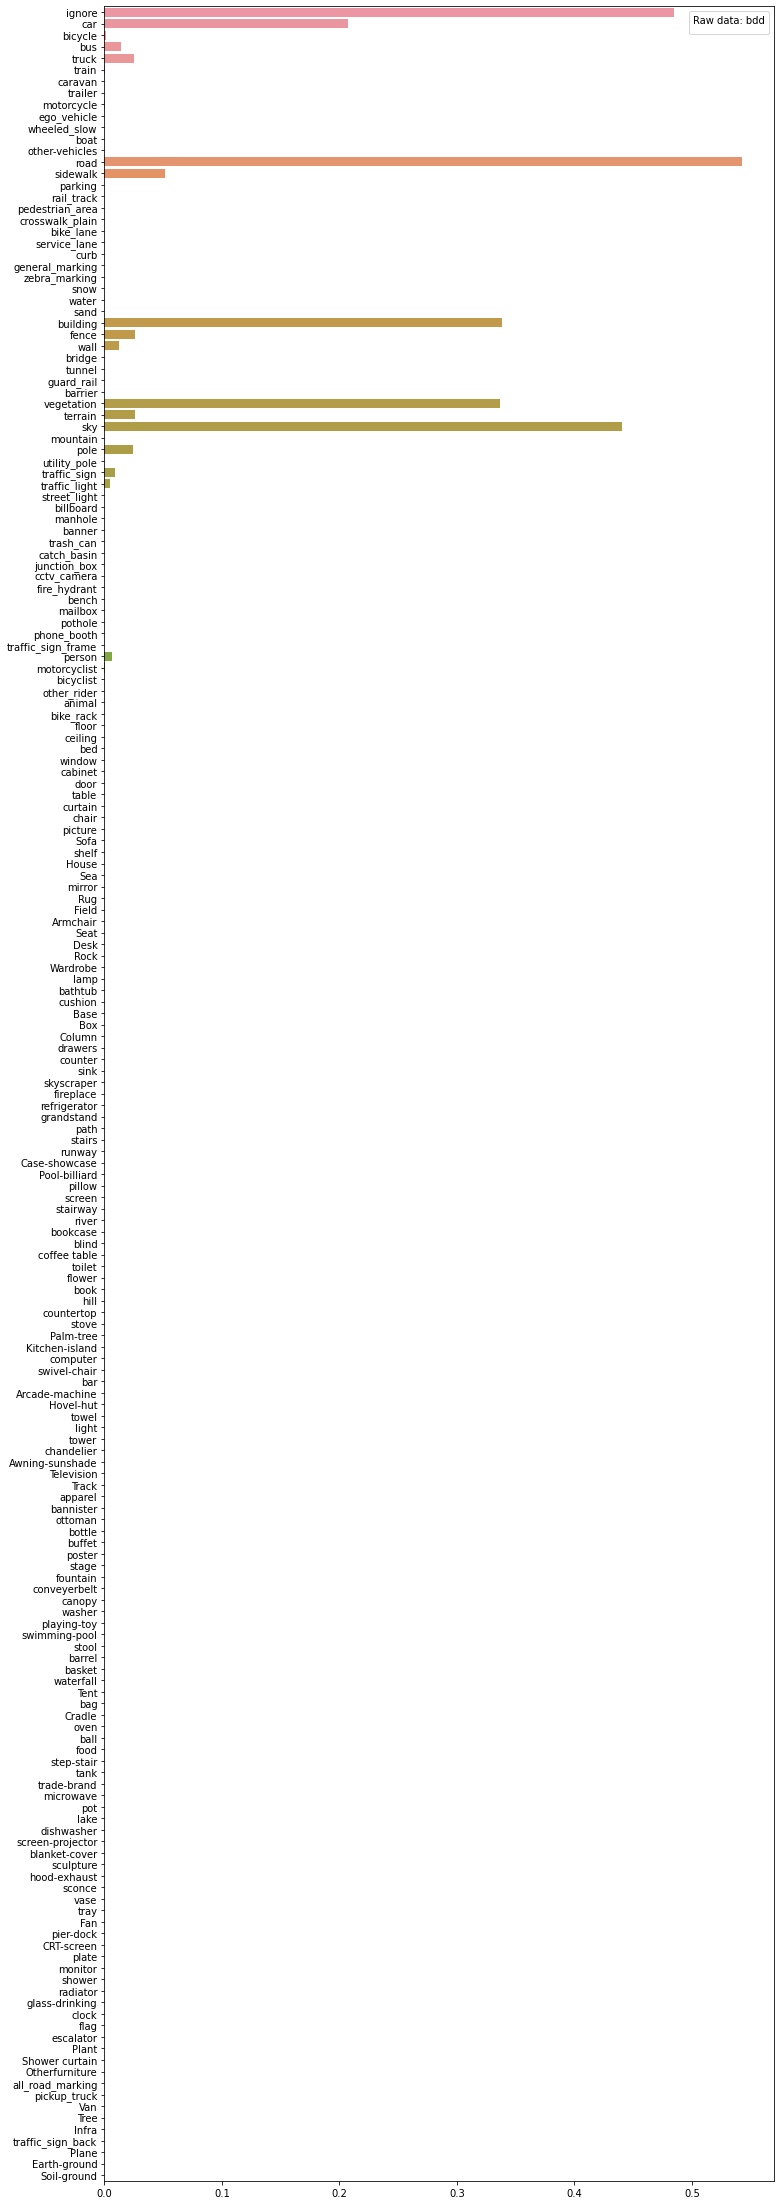

In [93]:
np.savetxt("bdd_pixel_count.csv", bdd_class_pixel_frq, delimiter=";")
norm = np.linalg.norm(bdd_class_pixel_frq)
bdd_class_pixel_frq_norm = bdd_class_pixel_frq/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=bdd_class_pixel_frq_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: bdd')

In [60]:
import seaborn as sns
import pandas as pd

In [95]:
classes = pd.read_csv("/netscratch/gautam/semseg/configs/_base_/class_mapping/universal_classes.csv", delimiter=";")
classes_name = classes["class_name"].tolist()

In [96]:
all_data_pixel_count = np.sum([class_pixel_frq,  a_class_pixel_frq, v_class_pixel_frq, vip_class_pixel_frq, idd_class_pixel_frq, wild_class_pixel_frq, bdd_class_pixel_frq, gta_class_pixel_frq, scannet_class_pixel_frq], axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


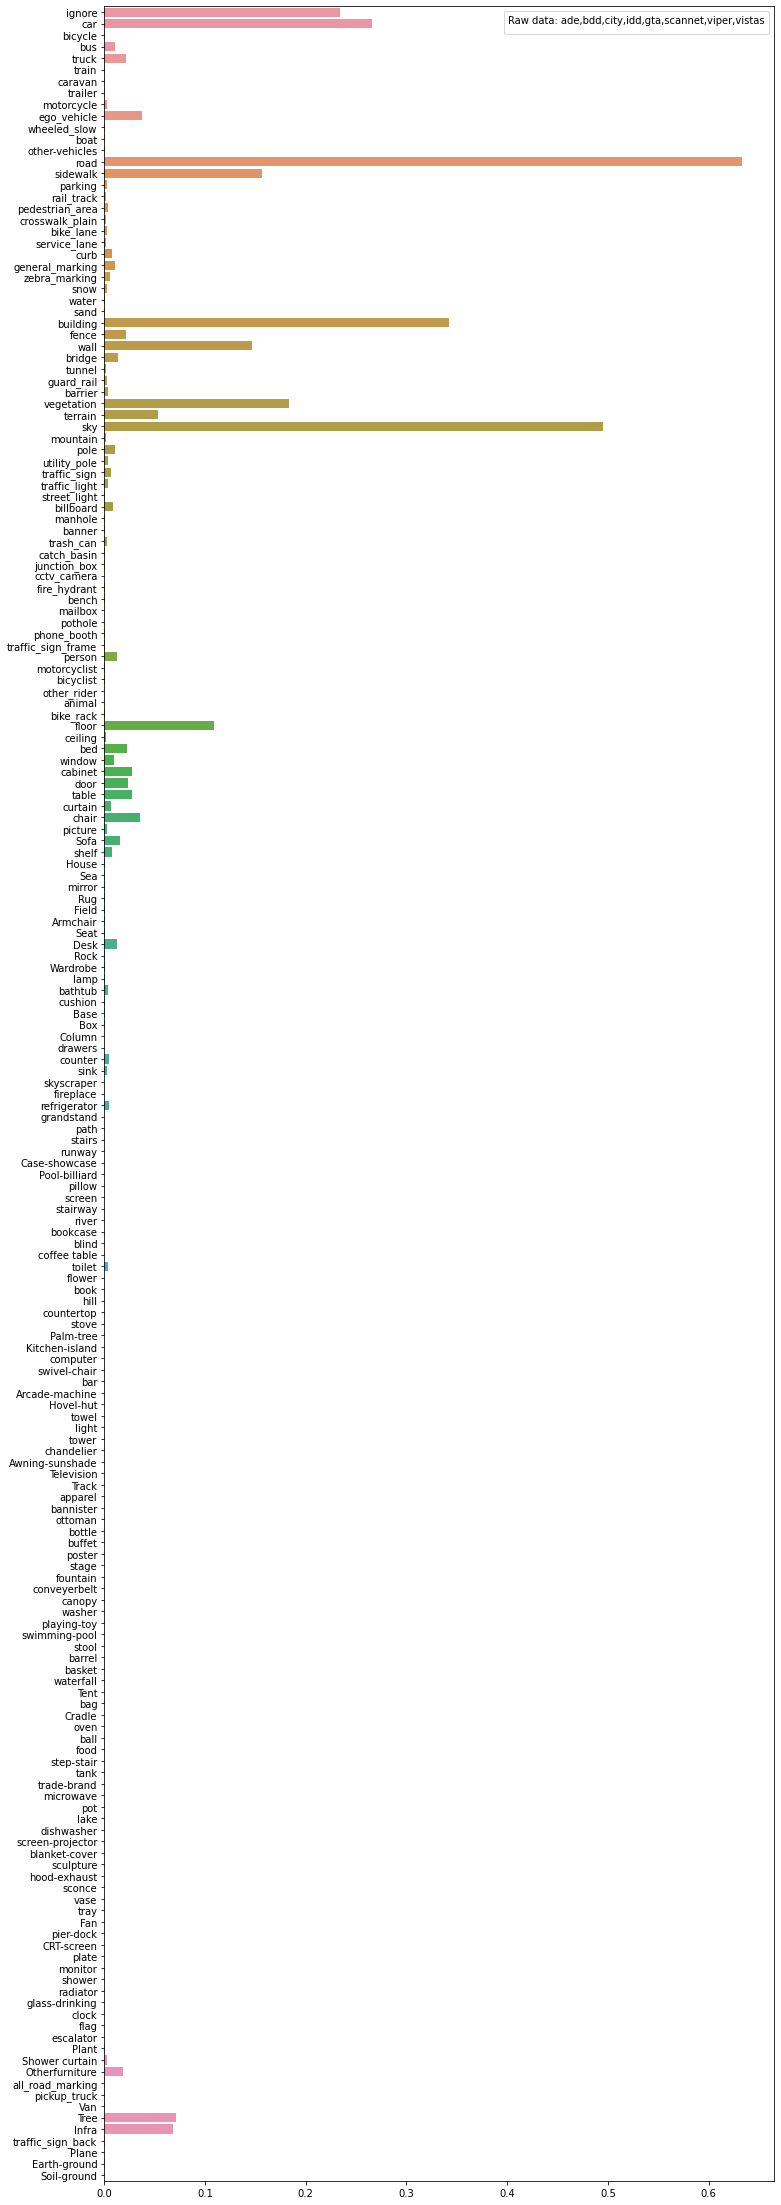

In [97]:

norm = np.linalg.norm(all_data_pixel_count)
all_data_pixel_count_norm = all_data_pixel_count/norm
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=all_data_pixel_count_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: ade,bdd,city,idd,gta,scannet,viper,vistas')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


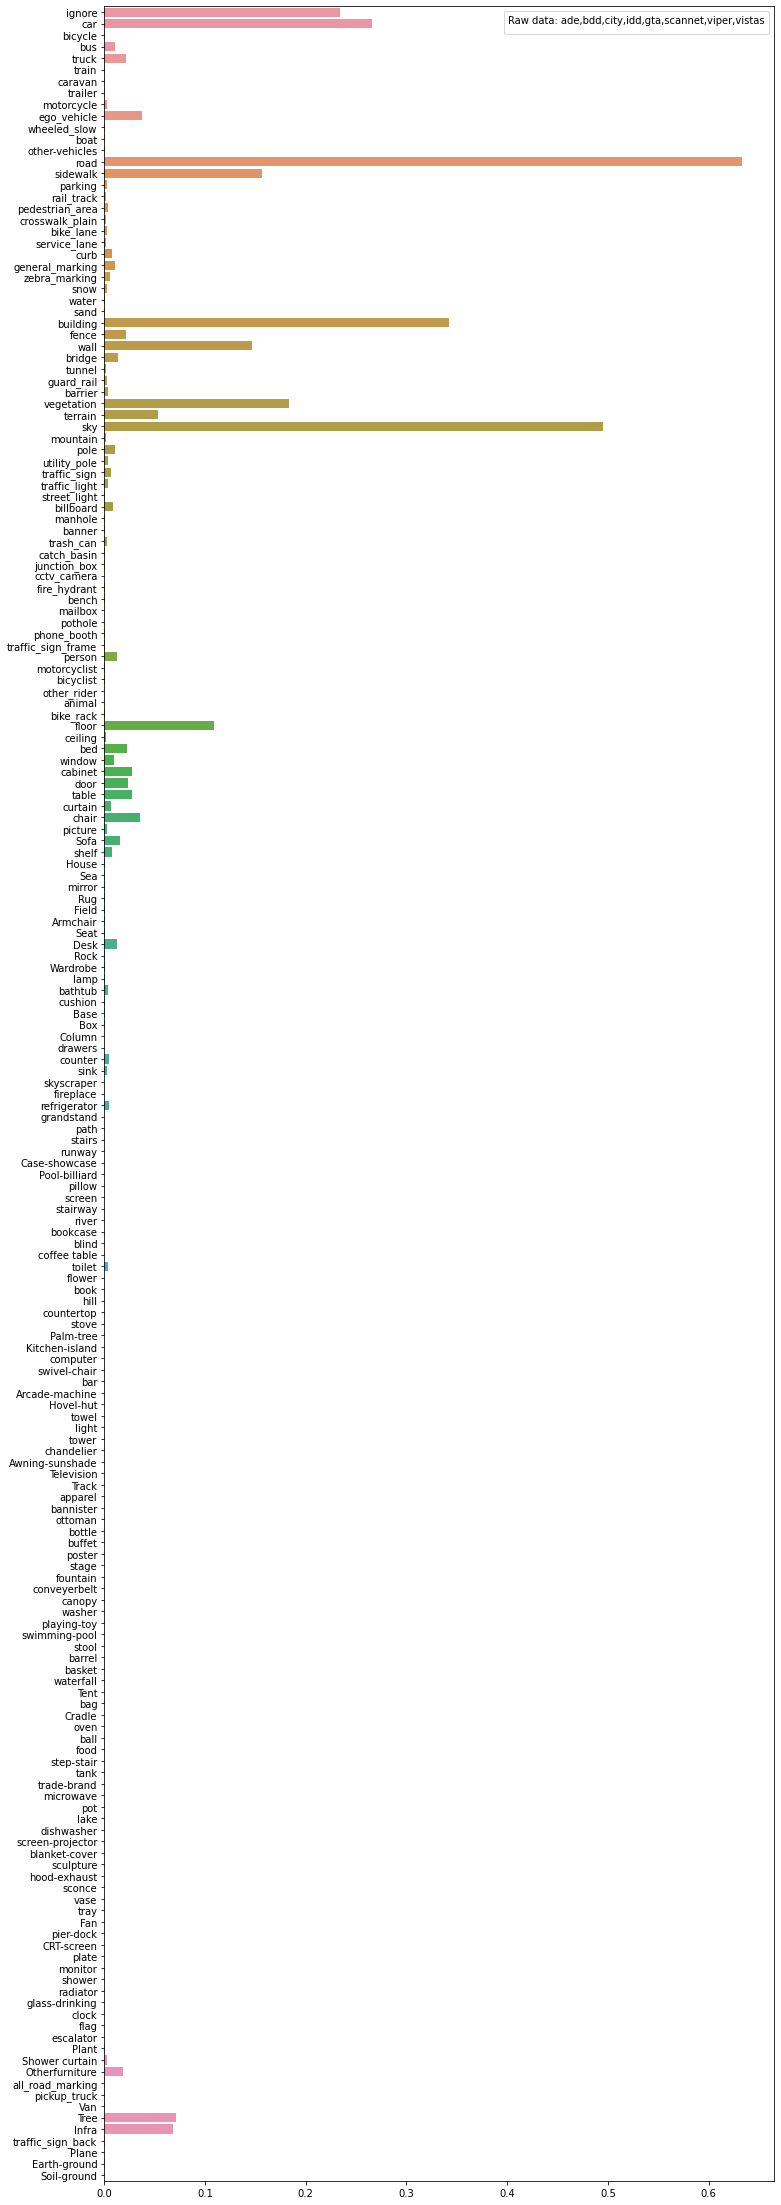

In [77]:
fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=all_data_pixel_count_norm, y=classes_name, ax=ax, )
plt.legend(title='Raw data: ade,bdd,city,idd,gta,scannet,viper,vistas')

In [79]:
np.savetxt("all_data_pixel_count.csv", all_data_pixel_count, delimiter=";")

In [80]:
df = pd.read_csv("all_data_pixel_count.csv")

In [82]:
df

,4.718377526600000000e+10
0,5.369894e+10
1,1.933186e+08
2,2.018502e+09
3,4.295919e+09
4,1.279608e+08
...,...
183,1.376264e+10
184,1.204216e+08
185,4.042868e+06
186,7.022743e+07
